In [ ]:
import pandas as pd
from datetime import datetime
import time
import numpy as np

In [ ]:
!nvidia-smi

Thu Feb  3 03:54:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir('MyDrive/Colab Notebooks/data/')

In [ ]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-02.csv

--2022-01-17 10:24:36--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-02.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1945357622 (1.8G) [application/octet-stream]
Saving to: ‘yellow_tripdata_2015-02.csv’

yellow_tripdata_201 100%[===================>]   1.81G  15.9MB/s    in 2m 1s   

2022-01-17 10:26:38 (15.4 MB/s) - ‘yellow_tripdata_2015-02.csv’ saved [1945357622/1945357622]



In [ ]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-03.csv

--2022-01-17 10:26:38--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-03.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.163.8
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.163.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2087971794 (1.9G) [application/octet-stream]
Saving to: ‘yellow_tripdata_2015-03.csv’

yellow_tripdata_201 100%[===================>]   1.94G  16.0MB/s    in 2m 16s  

2022-01-17 10:28:55 (14.6 MB/s) - ‘yellow_tripdata_2015-03.csv’ saved [2087971794/2087971794]



In [ ]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-04.csv

--2022-01-17 10:28:55--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-04.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.133.32
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.133.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2046225765 (1.9G) [application/octet-stream]
Saving to: ‘yellow_tripdata_2015-04.csv’

yellow_tripdata_201 100%[===================>]   1.91G  15.8MB/s    in 2m 13s  

2022-01-17 10:31:09 (14.7 MB/s) - ‘yellow_tripdata_2015-04.csv’ saved [2046225765/2046225765]



In [ ]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-05.csv

--2022-01-17 10:31:09--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-05.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.93.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.93.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2061869121 (1.9G) [application/octet-stream]
Saving to: ‘yellow_tripdata_2015-05.csv’

yellow_tripdata_201 100%[===================>]   1.92G  15.9MB/s    in 2m 16s  

2022-01-17 10:33:26 (14.5 MB/s) - ‘yellow_tripdata_2015-05.csv’ saved [2061869121/2061869121]



In [ ]:
import os
os.chdir('drive/MyDrive/Colab Notebooks')

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!mv *.csv data/

In [ ]:
#经纬度范围
MIN_LONGITUDE = -74.02
MAX_LONGITUDE = -73.95

MIN_LATITUDE = 40.67
MAX_LATITUDE = 40.77

#时间范围
start_time = pd.Timestamp(ts_input='2015-01-01 00:00:00')
end_time = pd.Timestamp(ts_input='2015-05-01 00:00:00')

# 1.读取数据

In [ ]:
path = 'nyc_taxi_data/'
select_columns = ['VendorID','tpep_pickup_datetime','trip_distance','tpep_dropoff_datetime','pickup_longitude',
                  'pickup_latitude','dropoff_longitude','dropoff_latitude']

In [ ]:
df = pd.DataFrame(columns=select_columns)
for i in range(1,5):
  filename = 'yellow_tripdata_2015-0'+str(i)+'.csv'
  tmp_df = pd.read_csv(os.path.join(path,filename),header=0)
  df = pd.concat([df,tmp_df],axis=0)

In [ ]:
df1 = df[select_columns]

In [ ]:
df1.head()

,VendorID,tpep_pickup_datetime,trip_distance,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2,2015-01-15 19:05:39,1.59,2015-01-15 19:23:42,-73.993896,40.750111,-73.974785,40.750618
1,1,2015-01-10 20:33:38,3.30,2015-01-10 20:53:28,-74.001648,40.724243,-73.994415,40.759109
2,1,2015-01-10 20:33:38,1.80,2015-01-10 20:43:41,-73.963341,40.802788,-73.951820,40.824413
3,1,2015-01-10 20:33:39,0.50,2015-01-10 20:35:31,-74.009087,40.713818,-74.004326,40.719986
4,1,2015-01-10 20:33:39,3.00,2015-01-10 20:52:58,-73.971176,40.762428,-74.004181,40.742653


# 2.数据清洗

In [ ]:
#2.1去除经纬度范围除异常值
print('before:',df1.shape)

df2 = df1[
      (df1['pickup_longitude'] >= MIN_LONGITUDE)\
    & (df1['pickup_longitude'] <= MAX_LONGITUDE)\
    & (df1['pickup_latitude'] >= MIN_LATITUDE)\
    & (df1['pickup_latitude'] <= MAX_LATITUDE)\
    & (df1['dropoff_longitude'] >= MIN_LONGITUDE)\
    & (df1['dropoff_longitude'] <= MAX_LONGITUDE)\
    & (df1['dropoff_latitude'] >= MIN_LATITUDE)\
    & (df1['dropoff_latitude'] <= MAX_LATITUDE)\
]
print('after:',df2.shape)
print('removed:{}'.format(df1.shape[0]-df2.shape[0]))

before: (12748986, 8)
after: (7331171, 8)
removed:5417815


In [ ]:
#2.2去除时间范围异常值
'''
df.loc[df['timeStamp'].dt.year == 2014]
df.loc[df['timeStamp'].dt.month == 5]
df.loc[df['timeStamp'].dt.second == 4]
df.loc[df['timeStamp'] == '2014-01-02']
df.loc[pd.to_datetime(df['timeStamp'].dt.date) == '2014-01-02']
'''
df2['pickup_time'] = pd.to_datetime(df2['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df2['dropoff_time'] = pd.to_datetime(df2['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

print('before:{}'.format(df2.shape))
df3 = df2[
      (df2['pickup_time'] >= start_time) \
    & (df2['pickup_time'] <= end_time)\
    & (df2['dropoff_time'] >= start_time)\
    & (df2['dropoff_time'] <= end_time)
]
print('after:{}'.format(df3.shape))
print('removed:{}'.format(df2.shape[0]-df3.shape[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


before:(7331171, 10)
after:(7327414, 10)
removed:3757


In [ ]:
#添加时间特征
df4 = df3.sort_values(by='pickup_time',ascending=True,na_position='first')
df4['dayofweek'] = df4['pickup_time'].apply(lambda x:x.dayofweek)

df4['year'] = df4['pickup_time'].apply(lambda x:x.year)
df4['month'] = df4['pickup_time'].apply(lambda x:x.month)
df4['day'] = df4['pickup_time'].apply(lambda x:x.day)
df4['hour'] = df4['pickup_time'].apply(lambda x:x.hour)

df4['is_weekend'] = df4['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df4.drop(['pickup_time','dropoff_time'],axis=1,inplace=True)
print(df4.shape)

(7327414, 14)


In [ ]:
df4.head()

,VendorID,tpep_pickup_datetime,trip_distance,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dayofweek,year,month,day,hour,is_weekend
8166885,2,2015-01-01 00:00:00,1.56,2015-01-01 00:00:00,-74.001320,40.729057,-74.010208,40.719662,3,2015,1,1,0,0
8166887,2,2015-01-01 00:00:03,2.57,2015-01-01 00:21:48,-73.969017,40.754269,-73.994133,40.761600,3,2015,1,1,0,0
5048598,2,2015-01-01 00:00:05,1.30,2015-01-01 00:10:52,-73.950500,40.769863,-73.950943,40.769825,3,2015,1,1,0,0
5048599,1,2015-01-01 00:00:06,0.00,2015-01-01 00:00:48,-73.985367,40.710770,-73.984772,40.710682,3,2015,1,1,0,0
5048604,2,2015-01-01 00:00:07,2.23,2015-01-01 00:16:47,-73.974152,40.737263,-73.996628,40.742512,3,2015,1,1,0,0


In [ ]:
def timeToUnix(t):
    # we have a time in the format "YYYY-MM-DD HH:MM:SS", which is a string
    # 这将把字符串时间转换为日期时间格式
    change = datetime.strptime(t, "%Y-%m-%d %H:%M:%S")  # this will convert the String time into datetime format
    t_tuple = change.timetuple()  # this will convert the datetime formatted time into structured time
    # 在德国+3600秒 = 格林威治时间
    return time.mktime(t_tuple) + 3600  

def dfWithTripTimes(df):
    '''
    时间戳转unix时间
    计算旅行时间
    计算平均速度
    '''
    startTime = datetime.now()
    duration = df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]]
    
    pickup_time = [timeToUnix(pkup) for pkup in duration["tpep_pickup_datetime"].values]
    dropoff_time = [timeToUnix(drpof) for drpof in duration["tpep_dropoff_datetime"].values]
    #     trip_duration = []
    #     for xy in zip(dropoff_time, pickup_time):
    #         trip_duration.append(xy[0] - xy[1])
    trip_duration = (np.array(dropoff_time) - np.array(pickup_time)) / float(60)  # trip duration in minutes 分钟

    NewFrame = df[['VendorID', 'trip_distance','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'dayofweek', 'year', 'month','day', 'hour', 'is_weekend']]
    
    NewFrame["trip_duration"] = trip_duration
    NewFrame["pickup_time"] = pickup_time
    NewFrame["dropoff_time"] = dropoff_time

    # 旅行的平均速度
    NewFrame["speed"] = (NewFrame["trip_distance"] / NewFrame["trip_duration"]) * 60  # speed in miles/hr
    print("Time taken for creation of dataframe is {}".format(datetime.now() - startTime))
    return NewFrame

def pickup_hourly_bins(dataframe, month, year, time_bin):
    # df,1,2015,1800
    # 添加time_bin列
    pickupTime = dataframe["pickup_time"].values
    dropoffTime = dataframe["dropoff_time"].values

    # (12341512,)
    print(pickupTime.shape)
    print(dropoffTime.shape)

    unixTime = [1420070400, 1451606400]  #格林威治时间
    #unixTime = [1420041600, 1451581200] #北京时间
    unix_year = unixTime[year - 2015]  # year - unixTime[0],2015会自动转成 2015-01-01 00:00:00 -> 1420070400

    pickup_time_60min_bin = [int((i - unix_year) / time_bin) for i in pickupTime]
    dropoff_time_60min_bin = [int((i - unix_year) / time_bin) for i in dropoffTime]

    dataframe["pickup_time_bin"] = np.array(pickup_time_60min_bin)
    dataframe["dropoff_time_bin"] = np.array(dropoff_time_60min_bin)
    return dataframe

In [ ]:
# 添加旅行时间，旅行平均速度，旅行距离
df5 = dfWithTripTimes(df4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time taken for creation of dataframe is 0:04:31.922632


In [ ]:
df5 = df5.dropna()

In [ ]:
print('before:{}'.format(df5.shape))

df6 = df5[(df5.trip_duration > 1) & (df5.trip_duration < 720)]
print("Trip Duration Outliers removed")
print("-" * 35)
df7 = df6[(df6.speed > 0) & (df6.speed < 45.31)]
print("Speed Outliers removed")
print("-" * 35)
df8 = df7[(df7.trip_distance > 0) & (df7.trip_distance < 23)]
print("Trip Distance Outliers removed")


print('after:{}'.format(df8.shape))
print('removed:{}'.format(df5.shape[0]-df8.shape[0]))

before:(7327343, 16)
Trip Duration Outliers removed
-----------------------------------
Speed Outliers removed
-----------------------------------
Trip Distance Outliers removed
after:(7276431, 16)
removed:50912


In [ ]:
df9 = pickup_hourly_bins(df8, 1, 2015, 60*60)
print("Pickup time bins are assigned")
print("-" * 35)
df9.sort_values(by='pickup_time_bin', axis=0, ascending=True, inplace=True)

# 按一小时计算2015 年1月有744个时间片
time_steps = len(np.unique(df9["pickup_time_bin"]))

print("There should be ((24*60)/60)*31 unique 60 minute time bins for the month of January 2015: ",str(time_steps))

(7276431,)
(7276431,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pickup time bins are assigned
-----------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


There should be ((24*60)/60)*31 unique 60 minute time bins for the month of January 2015:  744


In [ ]:
df9.head()

,VendorID,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dayofweek,year,month,day,hour,is_weekend,trip_duration,pickup_time,dropoff_time,speed,pickup_time_bin,dropoff_time_bin
8166887,2,2.57,-73.969017,40.754269,-73.994133,40.761600,3,2015,1,1,0,0,21.750000,1.420074e+09,1.420075e+09,7.089655,1,1
10224093,1,0.50,-73.963516,40.757423,-73.963577,40.763615,3,2015,1,1,0,0,1.916667,1.420077e+09,1.420077e+09,15.652174,1,1
10224101,2,1.50,-74.006302,40.733612,-74.002213,40.750423,3,2015,1,1,0,0,6.216667,1.420077e+09,1.420077e+09,14.477212,1,1
10224098,2,0.99,-73.982887,40.742161,-73.991013,40.750751,3,2015,1,1,0,0,6.466667,1.420077e+09,1.420077e+09,9.185567,1,1
10224096,1,0.80,-73.984779,40.732182,-73.991531,40.738907,3,2015,1,1,0,0,5.450000,1.420077e+09,1.420077e+09,8.807339,1,1


# 3. 划分格子 按小时统计进出车流量

In [ ]:
num_rows,num_cols = 16,16
def get_grid(df):
    '''
    将上下车坐标映射到网格
    '''
    def mapping_location_grid(longitude,latitude):

        lon = round(longitude,6)
        lat = round(latitude,6)

        flag,grid = 0,0
        if lon < MIN_LONGITUDE:
            flag = 0
            grid = 0
        elif lon > MAX_LONGITUDE:
            flag = 1
            grid = num_rows * num_cols - 1
        elif lat < MIN_LATITUDE:
            flag = 2
            grid = 0
        elif lat > MAX_LATITUDE:
            flag = 3
            grid = num_rows * num_cols - 1

        if(flag > 0):
            print('outliers:{},{}'.format(lon,lat))

        lon_column = (MAX_LONGITUDE - MIN_LONGITUDE) / num_rows
        lat_row = (MAX_LATITUDE - MIN_LATITUDE) / num_cols
        grid = int((lon - MIN_LONGITUDE)/lon_column) + int((lat-MIN_LATITUDE)/lat_row) * num_cols
        
        return grid

    vfunc = np.vectorize(mapping_location_grid)
    df['pickup_grid'] = vfunc(df['pickup_longitude'], df['pickup_latitude'])
    df['dropoff_grid'] = vfunc(df['dropoff_longitude'], df['dropoff_latitude'])
    
    return df

def get_inout_flow(pickup_df,dropoff_df,time_steps,row_num,col_num):
    '''
    获取每个格子每个小时的进出车流量
    '''
    image_list = []
    node_list = []
    timestep = []
    
    for timeslot in range(time_steps):
        pickup_tmpt = pickup_df[pickup_df['pickup_time_bin'] == timeslot]
        dropoff_tmpt = dropoff_df[dropoff_df['dropoff_time_bin'] == timeslot]
        
        image_feat = np.zeros(shape=(2, row_num, col_num))
        node_feat = np.zeros(shape=(row_num*col_num,2))

        if(pickup_tmpt.shape[0]>0):    #该时间片内有上车记录
            for j in range(pickup_tmpt.shape[0]):
                pickup_row,pickup_col = int(pickup_tmpt.iloc[j]['pickup_grid']/row_num),int(pickup_tmpt.iloc[j]['pickup_grid']%col_num)
                if(pickup_row>=row_num or pickup_col>=col_num):
                    continue
                image_feat[0,pickup_row,pickup_col] = pickup_tmpt.iloc[j]['pickup_order_num']
                node_feat[pickup_tmpt.iloc[j]['pickup_grid'],0] = pickup_tmpt.iloc[j]['pickup_order_num']
                
        if(dropoff_tmpt.shape[0]>0):  #该时间片内有下车记录
             for j in range(dropoff_tmpt.shape[0]):
                dropoff_row,dropoff_col = int(dropoff_tmpt.iloc[j]['dropoff_grid']/row_num),int(dropoff_tmpt.iloc[j]['dropoff_grid']%col_num)
                if(dropoff_row>row_num or dropoff_col>col_num):
                    continue
                image_feat[1,dropoff_row,dropoff_col] = dropoff_tmpt.iloc[j]['dropoff_order_num']
                node_feat[dropoff_tmpt.iloc[j]['dropoff_grid'],1] = dropoff_tmpt.iloc[j]['dropoff_order_num']
        
        image_list.append(image_feat)  
        node_list.append(node_feat)
        timestep.append(timeslot)
        
    image_list = np.stack(image_list)
    node_list = np.stack(node_list)

    print('image_list:{},node_list:{},timestep:{}'.format(image_list.shape,node_list.shape,len(timestep)))
                      
    return image_list, node_list, np.array(timestep)

In [ ]:
df10 = get_grid(df9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df10.head()

,VendorID,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dayofweek,year,month,day,hour,is_weekend,trip_duration,pickup_time,dropoff_time,speed,pickup_time_bin,dropoff_time_bin,pickup_grid,dropoff_grid
8166887,2,2.57,-73.969017,40.754269,-73.994133,40.761600,3,2015,1,1,0,0,21.750000,1.420074e+09,1.420075e+09,7.089655,1,1,219,229
10224093,1,0.50,-73.963516,40.757423,-73.963577,40.763615,3,2015,1,1,0,0,1.916667,1.420077e+09,1.420077e+09,15.652174,1,1,220,236
10224101,2,1.50,-74.006302,40.733612,-74.002213,40.750423,3,2015,1,1,0,0,6.216667,1.420077e+09,1.420077e+09,14.477212,1,1,163,196
10224098,2,0.99,-73.982887,40.742161,-73.991013,40.750751,3,2015,1,1,0,0,6.466667,1.420077e+09,1.420077e+09,9.185567,1,1,184,198
10224096,1,0.80,-73.984779,40.732182,-73.991531,40.738907,3,2015,1,1,0,0,5.450000,1.420077e+09,1.420077e+09,8.807339,1,1,152,182


In [ ]:
#每个时间片上车统计
pickup_order_records = df10[["pickup_time_bin", "pickup_grid"]].groupby(by=["pickup_time_bin", "pickup_grid"])[
    'pickup_time_bin'].size()
pickup_order_records = pickup_order_records.reset_index(name='pickup_order_num')

#每个时间片下车统计
dropoff_order_records = df10[["dropoff_time_bin", "dropoff_grid"]].groupby(by=["dropoff_time_bin", "dropoff_grid"])[
    'dropoff_time_bin'].size()
dropoff_order_records = dropoff_order_records.reset_index(name='dropoff_order_num')

In [ ]:
pickup_order_records.head()

,pickup_time_bin,pickup_grid,pickup_order_num
0,1,4,1
1,1,5,1
2,1,6,1
3,1,7,8
4,1,8,9


In [ ]:
dropoff_order_records.head()

,dropoff_time_bin,dropoff_grid,dropoff_order_num
0,1,4,2
1,1,7,4
2,1,8,11
3,1,9,5
4,1,10,10


In [ ]:
import gc
del df4, df5, df6, df7, df8
gc.collect()

199

In [ ]:
#将上下车记录映射到网格
image_list, node_list, timestep = get_inout_flow(pickup_order_records,dropoff_order_records,time_steps,num_rows,num_cols)

image_list:(744, 2, 16, 16),node_list:(744, 256, 2),timestep:744


In [ ]:
node_list[1].sum(axis=0)

array([14895., 11485.])

In [ ]:
image_list[1].sum(axis=2).sum(axis=1)

array([14895., 11485.])

In [ ]:
np.savez('./nyc_data/in_out_image.npz',data=image_list)

In [ ]:
np.savez('./nyc_data/inout_node_feat.npz',data=node_list)

In [ ]:
del image_list, node_list, timestep
gc.collect()

855

In [ ]:
m_1 = np.load('./nyc_data/in_out_image.npz')
print(m_1['data'].shape)

(744, 2, 16, 16)


In [ ]:
m_list = m_1['data']

array([[  0.,   0.,   0.,   0.,   2.,   0.,   0.,   4.,  11.,   5.,  10.,
          4.,   5.,   5.,   8.,   5.],
       [  0.,   1.,   0.,   3.,   8.,  12.,   2.,   1.,   7.,  10.,   9.,
          5.,   6.,   7.,   5.,   2.],
       [  0.,   0.,   0.,   2.,  11.,  10.,  22.,   5.,  14.,  19.,  10.,
          2.,   8.,   5.,  11.,   6.],
       [  0.,   0.,   0.,   0.,   4.,  21.,  30.,  15.,   7.,   6.,   4.,
         10.,   6.,   6.,  13.,   9.],
       [  0.,   1.,   0.,   0.,   0.,   6.,  13.,   7.,   5.,   0.,   1.,
          1.,   1.,   2.,   3.,   0.],
       [ 31.,  66., 100.,  32.,   2.,   0.,   2.,   6.,   4.,   0.,   0.,
          0.,   0.,   0.,   2.,   4.],
       [ 51.,  73.,  69.,  59.,  12.,  20.,   9.,  13.,   9.,  11.,   0.,
         19.,  25.,  28.,  29.,  24.],
       [ 15.,  30.,  67.,  83.,  67.,  73.,  73.,  87.,  25.,  18.,   3.,
          0.,  10.,  23.,  32.,  28.],
       [  0.,   2.,  25., 114.,  93., 113., 124., 168., 100.,  78.,  12.,
          0.,   0.,   

In [ ]:
img = m_list[0,1,:,:]

In [ ]:
img

array([[  0.,   0.,   0.,   0.,   2.,   0.,   0.,   4.,  11.,   5.,  10.,
          4.,   5.,   5.,   8.,   5.],
       [  0.,   1.,   0.,   3.,   8.,  12.,   2.,   1.,   7.,  10.,   9.,
          5.,   6.,   7.,   5.,   2.],
       [  0.,   0.,   0.,   2.,  11.,  10.,  22.,   5.,  14.,  19.,  10.,
          2.,   8.,   5.,  11.,   6.],
       [  0.,   0.,   0.,   0.,   4.,  21.,  30.,  15.,   7.,   6.,   4.,
         10.,   6.,   6.,  13.,   9.],
       [  0.,   1.,   0.,   0.,   0.,   6.,  13.,   7.,   5.,   0.,   1.,
          1.,   1.,   2.,   3.,   0.],
       [ 31.,  66., 100.,  32.,   2.,   0.,   2.,   6.,   4.,   0.,   0.,
          0.,   0.,   0.,   2.,   4.],
       [ 51.,  73.,  69.,  59.,  12.,  20.,   9.,  13.,   9.,  11.,   0.,
         19.,  25.,  28.,  29.,  24.],
       [ 15.,  30.,  67.,  83.,  67.,  73.,  73.,  87.,  25.,  18.,   3.,
          0.,  10.,  23.,  32.,  28.],
       [  0.,   2.,  25., 114.,  93., 113., 124., 168., 100.,  78.,  12.,
          0.,   0.,   

In [ ]:
import matplotlib.pyplot as plt

def show_image(img):
    plt.imshow(img)
    plt.colorbar()
    plt.axis('off')
    plt.show()

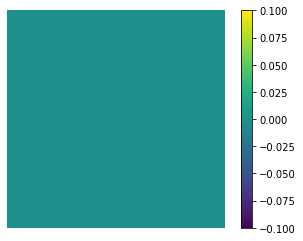

In [ ]:
show_image(m_list[0,0,:,:])

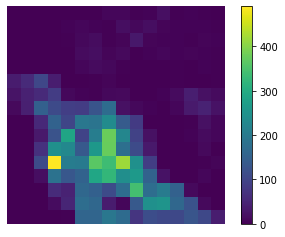

In [ ]:
show_image(m_list[1,0,:,:])

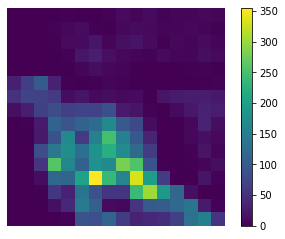

In [ ]:
show_image(m_list[1,1,:,:])

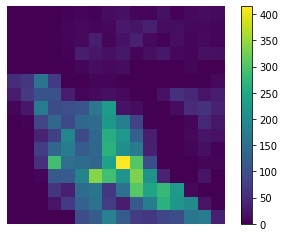

In [ ]:
show_image(m_list[2,0,:,:])

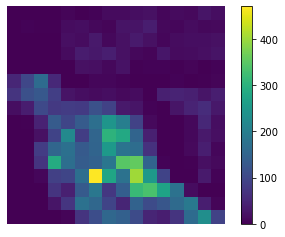

In [ ]:
show_image(m_list[2,1,:,:])

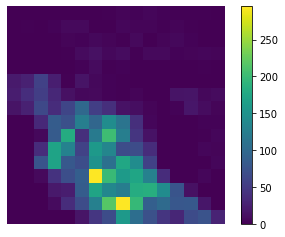

In [ ]:
show_image(m_list[21,1,:,:])

In [ ]:
def show_flow(arr,i,j):
    x = list(np.arange(120))
    y1 = arr[:120,0,i,j]
    
    y2 = arr[:120,1,i,j]
    
    plt.plot(x,y1,color='blue',label='inflow')
    plt.plot(x,y2,color='red',label='outflow')
    
    plt.xlabel('time')
    plt.xlabel('num')
    plt.title('flow of {},{}'.format(i,j))
    plt.legend(loc=1)
    plt.show()

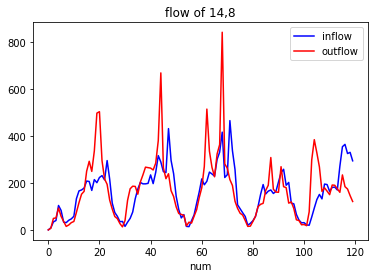

In [ ]:
show_flow(m_list,14,8)

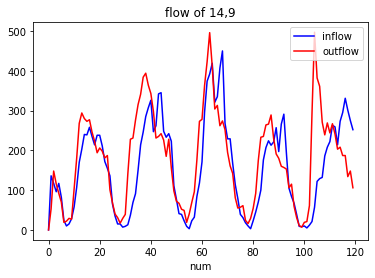

In [ ]:
show_flow(m_list,14,9)

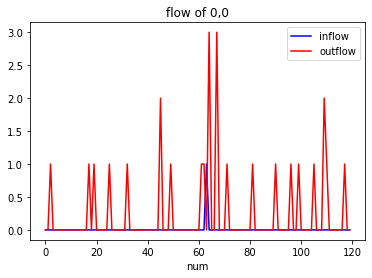

In [ ]:
show_flow(m_list,0,0)

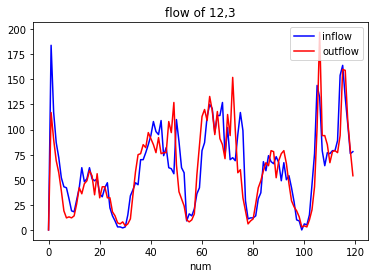

In [ ]:
show_flow(m_list,12,3)

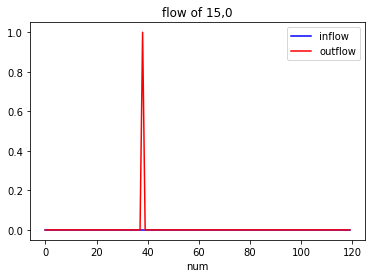

In [ ]:
show_flow(m_list,15,0)

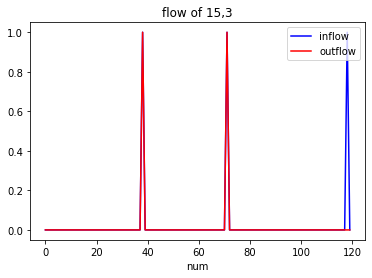

In [ ]:
show_flow(m_list,15,3)

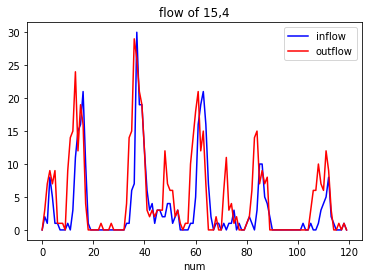

In [ ]:
show_flow(m_list,15,4)

# 4.按小时统计OD车流量


In [ ]:
def get_od_matrix(start_time, end_time, file_dir, order_records,grid_num):
    print('def get_od_matrix()！', time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())))
    time_slot = start_time
    density = 0
    m_list = []
    
    while time_slot < end_time:
        tmpt = order_records[order_records['pickup_time_bin'] == time_slot]
        #         print('#####################################################################')
        #         print('Order Records in this hour:', tmpt['order_num'].sum())
        density +=  tmpt.shape[0] / (grid_num * grid_num)
        matrix = pd.DataFrame(np.zeros(shape=(grid_num,grid_num)))
        
        for j in range(tmpt.shape[0]):
            matrix[tmpt.iloc[j]['pickup_grid']][tmpt.iloc[j]['dropoff_grid']] = tmpt.iloc[j]['order_num']
            
        m_list.append(matrix)
        print('Time slot:', time_slot,' density:',density)
        time_slot += 1
        
    matrix_all = pd.DataFrame(pd.concat(m_list, ignore_index=True, axis =0).reset_index(drop=True))
    print('Start writing files:', time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())))
    print(matrix_all.shape)
    matrix_all.to_csv(file_dir, header=False, index=False)
    density = density / 48.0
    
    #     print'data_density = ', density
    print('Finish finally, ', time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())))
    
    return matrix_all,density

In [ ]:
order_records = df10[["pickup_time_bin", "pickup_grid", "dropoff_grid"]].groupby(by=["pickup_time_bin", "pickup_grid", "dropoff_grid"])[
    'pickup_time_bin'].size()

order_records = order_records.reset_index(name='order_num')

matrix_all, density = get_od_matrix(start_time=0, end_time=time_steps, file_dir='./nyc_data/od_matrix.csv',
                                  order_records=order_records,grid_num = num_rows*num_cols)

def get_od_matrix()！ 2022-01-17 14:01:19
Time slot: 0  density: 0.0
Time slot: 1  density: 0.09857177734375
Time slot: 2  density: 0.2071380615234375
Time slot: 3  density: 0.3087921142578125
Time slot: 4  density: 0.3997802734375
Time slot: 5  density: 0.467376708984375
Time slot: 6  density: 0.5072021484375
Time slot: 7  density: 0.5369415283203125
Time slot: 8  density: 0.5641326904296875
Time slot: 9  density: 0.5931396484375
Time slot: 10  density: 0.628570556640625
Time slot: 11  density: 0.676483154296875
Time slot: 12  density: 0.7387237548828125
Time slot: 13  density: 0.8092498779296875
Time slot: 14  density: 0.881988525390625
Time slot: 15  density: 0.9535064697265625
Time slot: 16  density: 1.02423095703125
Time slot: 17  density: 1.091339111328125
Time slot: 18  density: 1.1612548828125
Time slot: 19  density: 1.23175048828125
Time slot: 20  density: 1.299835205078125
Time slot: 21  density: 1.3649749755859375
Time slot: 22  density: 1.430206298828125
Time slot: 23  densi

In [ ]:
matrix_all.shape

(190464, 256)

In [ ]:
grid_num = num_rows * num_cols
matrix_all_od = np.reshape(matrix_all.values,(-1,grid_num,grid_num))

In [ ]:
matrix_all_od.shape

(744, 256, 256)

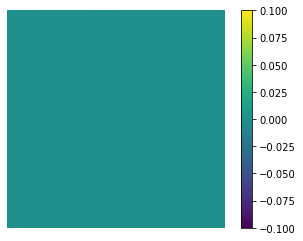

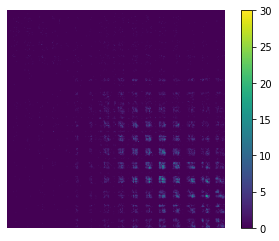

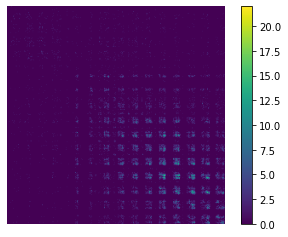

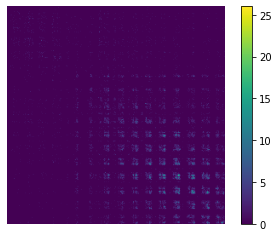

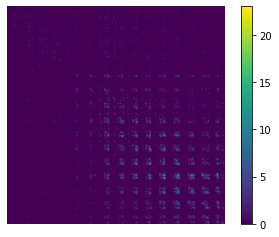

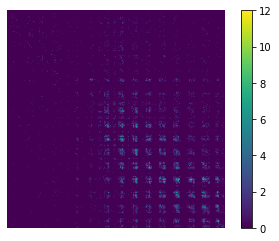

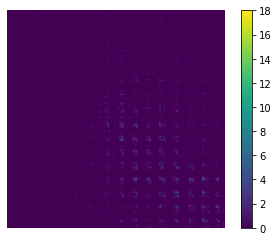

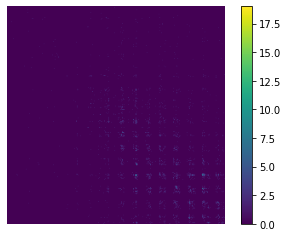

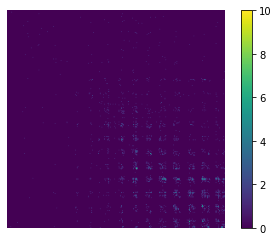

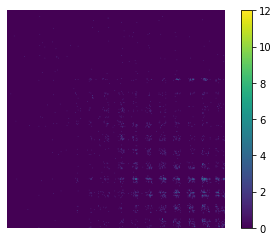

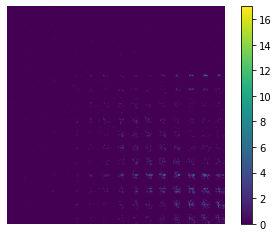

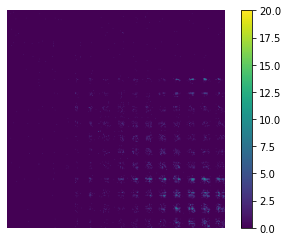

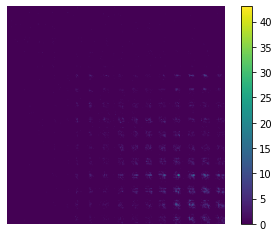

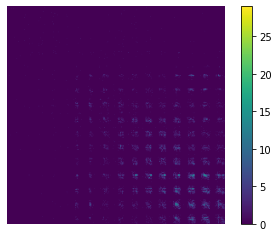

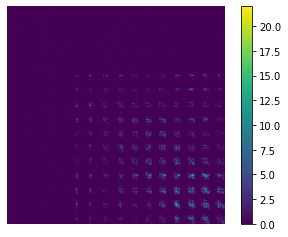

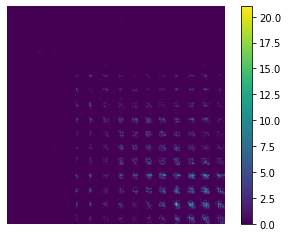

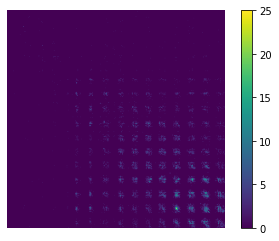

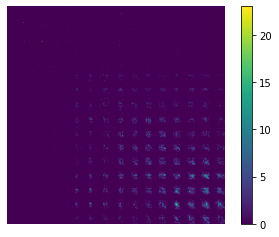

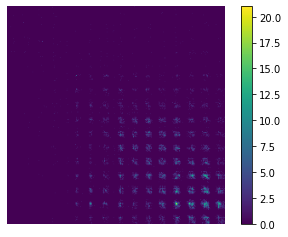

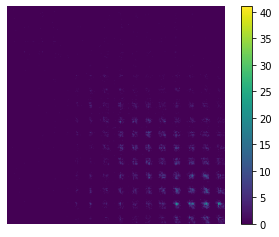

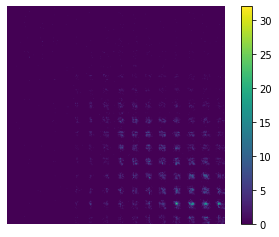

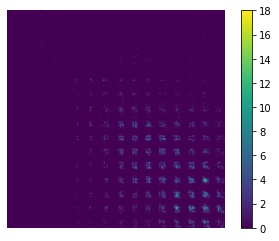

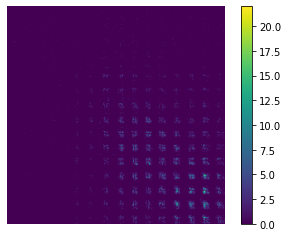

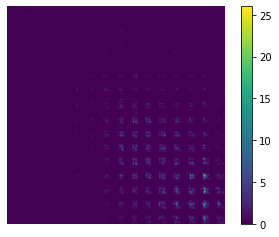

In [ ]:
for i in range(24):
    show_image(matrix_all_od[i:(i+1)].squeeze(0))

In [ ]:
def show_od_flow(matrix,start,end,i,j):
    x = list(np.arange(start,end,1))
    y = matrix_all_od[start:end,i,j]
    
    plt.plot(x,y,color='blue')
    plt.show()   

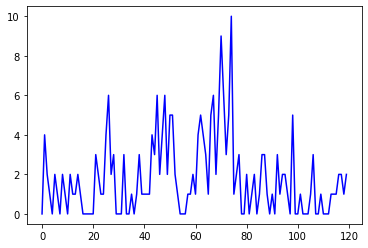

In [ ]:
show_od_flow(matrix_all_od,0,120,148,148)

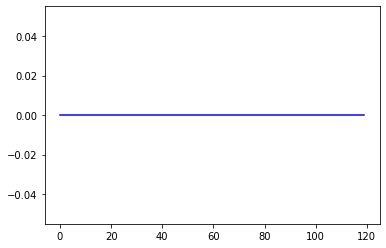

In [ ]:
show_od_flow(matrix_all_od,0,120,0,0)

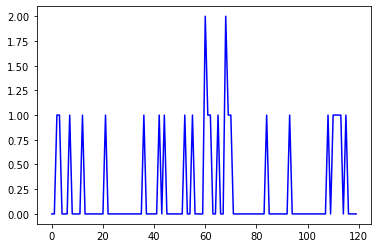

In [ ]:
show_od_flow(matrix_all_od,0,120,220,221)

In [ ]:
def get_od_image(matrix_all):
    
    od_image_all = []
    for i in range(time_steps):
        out_od_matrix = matrix_all_od[i].reshape((-1,num_rows,num_cols))
        in_od_matrix = out_od_matrix.T.reshape((-1,num_rows,num_cols))
        all_od = np.concatenate([out_od_matrix,in_od_matrix],axis=0)
        od_image_all.append(all_od)
    od_img_all = np.stack(od_image_all,axis=0)
    
    return od_img_all

od_img_all = get_od_image(matrix_all_od)

In [ ]:
od_img_all.shape

(744, 512, 16, 16)

In [ ]:
np.savez('./nyc_data/od_flow_image.npz',data=od_img_all)

In [ ]:
m_2 = np.load('./nyc_data/od_flow_image.npz')
print(m_2['data'].shape)

(744, 512, 16, 16)


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/nyc_data/')

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/nyc_data


In [ ]:
!cp od_matrix.csv ../../ODCRN/data/

In [ ]:
!cp inout_node_feat.npz ../../ODCRN/data/